In [25]:
%matplotlib inline
import pandas as pd

In [113]:
with pd.HDFStore('../data/all_semcog_data_07-28-17.h5') as store:
    hh_totals = store['annual_household_control_totals']
    job_totals = store['annual_employment_control_totals']
    sd = store['events_addition']
    parcels = store['parcels']
    werla = store['workers_employment_rates_by_large_area']
    jobs_table = store['jobs']

### Household Control Totals

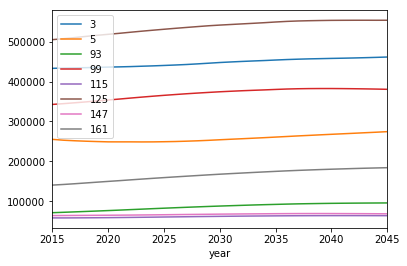

In [75]:
hh = (hh_totals
        .reset_index()
        .groupby(['large_area_id', 'year'])
        .sum()
        .reset_index()
        .pivot(index='large_area_id', columns='year', values='total_number_of_households'))

for lid in hh.index.values:
    hh.loc[lid].plot(legend=True)

### Employment Control Totals

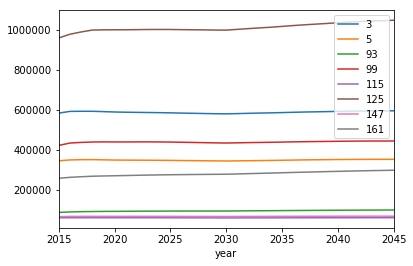

In [70]:
jobs = (job_totals
        .reset_index()
        .groupby(['large_area_id', 'year'])
        .sum()
        .reset_index()
        .pivot(index='large_area_id', columns='year', values='total_number_of_jobs'))

for lid in jobs.index.values:
    jobs.loc[lid].plot(legend=True)

### Target Vacancies

In [21]:
tv = pd.read_csv('../data/target_vacancies.csv')

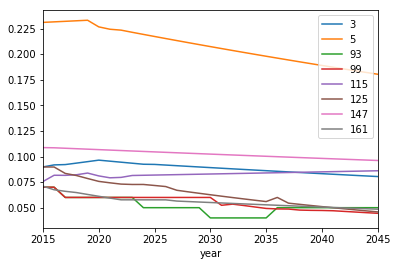

In [47]:
res = tv.pivot(index='large_area_id', columns='year', values='res_target_vacancy_rate')
for lid in res.index.values:
    res.loc[lid].plot(legend=True)

### Scheduled developments

In [79]:
sd = sd.merge(parcels[['large_area_id']], left_on='parcel_id', right_index=True)

In [94]:
sd.head()

,building_type_id,non_residential_sqft,residential_units,year_built,parcel_id,large_area_id
objectid,,,,,,
1289,53,100000,0,2020,1365347,3
1288,21,28000,0,2020,1365349,3
1286,83,0,65,2020,1366369,3
1281,31,300000,0,2020,1367821,3
1279,31,300000,0,2020,1367823,3


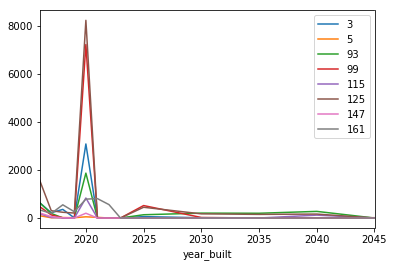

In [88]:
devs = (sd.groupby(['year_built', 'large_area_id'])
        .size()
        .reset_index()
        .rename(columns={0: 'buildings'})
        .pivot(index='large_area_id', columns='year_built', values='buildings'))

for i in devs.index.values:
    devs.fillna(0).loc[i].plot(legend=True)

### workers_employment_rates_by_large_area

In [106]:
werla.head()

,age_min,age_max,2010,2013,2014,2015,2016,2017,2018,2019,...,2037,2038,2039,2040,2041,2042,2043,2044,2045,la_rates
large_area_id,,,,,,,,,,,,,,,,,,,,,
3,16,19,0.351275,0.324254,0.315247,0.315247,0.306240,0.297233,0.297233,0.288226,...,0.297233,0.297233,0.297233,0.297233,0.297233,0.306240,0.306240,0.306240,0.306240,0.900705
3,20,21,0.558437,0.522409,0.513402,0.504395,0.504395,0.486381,0.486381,0.477374,...,0.477374,0.486381,0.486381,0.486381,0.486381,0.486381,0.486381,0.495388,0.495388,0.900705
3,22,24,0.693543,0.666522,0.666522,0.666522,0.675529,0.675529,0.684536,0.684536,...,0.702550,0.702550,0.702550,0.702550,0.702550,0.711557,0.711557,0.711557,0.711557,0.900705
3,25,29,0.720564,0.720564,0.711557,0.711557,0.720564,0.711557,0.711557,0.711557,...,0.729571,0.729571,0.729571,0.729571,0.729571,0.729571,0.738578,0.738578,0.738578,0.900705
3,30,34,0.729571,0.729571,0.720564,0.720564,0.729571,0.729571,0.729571,0.729571,...,0.747585,0.747585,0.747585,0.747585,0.747585,0.747585,0.756592,0.756592,0.756592,0.900705


### government jobs

In [110]:
jobs = job_totals.reset_index()
g_jobs = (jobs.loc[jobs.sector_id == 18].groupby(['large_area_id', 'year'])
          .sum()
          .reset_index()
          .pivot(index='large_area_id', columns='year', values='total_number_of_jobs'))

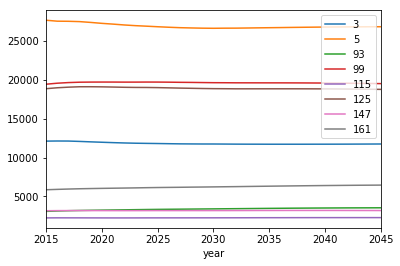

In [112]:
for lid in g_jobs.index.values:
    g_jobs.loc[lid].plot(legend=True)